# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
print(lats)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
print(lngs)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

[ 68.42013829  12.43907127  25.21340823 ... -53.26045143 -74.30549714
 -65.0850747 ]
[ 109.0475663    86.69561775   46.38101422 ...  -18.51306194 -139.77210006
 -135.45754705]


617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

city = cities[0]
print(query_url + city)

#print(cities)

http://api.openweathermap.org/data/2.5/weather?appid=bb55dd03bd01fd2cfb5d75cdf6efbe30&units=metric&q=aykhal


In [23]:
# Loop through the list of cities and perform a request for data on each
lat = []
lng = []
temp= []
humid = []
cloud = []
wind = []
mycity= []
country = []

for city in cities:
    response = requests.get(query_url + city).json()
    
    (response).keys
    try:
        mycity.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        print(f"City found {city}!")
    except KeyError as e:
        print(f"*** City not found {city}! {e}")
   

# print(f"The latitude information received is: {lat}")
# print(f"The temperature information received is: {temp}")


City found aykhal!
City found port blair!
City found riyadh!
City found birjand!
City found kodiak!
City found hede!
*** City not found belushya guba! 'name'
City found tabuk!
City found soyo!
City found punta arenas!
City found hermanus!
City found inhambane!
City found rikitea!
City found sembe!
City found rio gallegos!
City found raga!
City found tuktoyaktuk!
City found meadow lake!
City found ushuaia!
City found port alfred!
City found hofn!
City found fasa!
*** City not found taolanaro! 'name'
City found nantucket!
*** City not found karkaralinsk! 'name'
City found ixtapa!
City found cidreira!
City found new norfolk!
City found cape town!
City found toccoa!
City found san patricio!
City found bredasdorp!
City found ust-ishim!
City found ola!
City found ribeira grande!
City found saskylakh!
City found avarua!
City found ler!
City found bluff!
City found hasaki!
City found gat!
City found khatanga!
City found port elizabeth!
City found te anau!
City found hobart!
*** City not found 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
city_weather_dict = {
    "Country": country,
    "City": mycity,
    "lat": lat,
    "lng": lng,
    "temp": temp,
    "humidity": humid,
    "cloudy": cloud,
    "windy": wind   
}
city_weather_data = pd.DataFrame(city_weather_dict)
city_weather_data

#export city data
city_weather_data.to_csv('..\output_data\weather_city.csv')

In [26]:
# len(lat)
# len(lng)
# len(temp)
# len(humid)
# len(cloud)
# len(wind)
# len(mycity)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

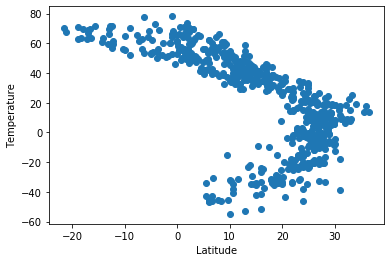

In [27]:
# Temperature (F) vs. Latitude
x_values = city_weather_data['temp']
y_values = city_weather_data['lat']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

#### Latitude vs. Humidity Plot

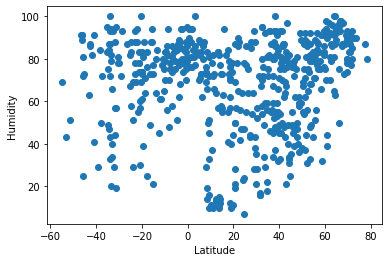

In [28]:
# Humidity (%) vs. Latitude
x_values = city_weather_data['lat']
y_values = city_weather_data['humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

#### Latitude vs. Cloudiness Plot

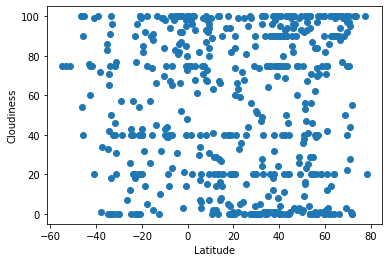

In [29]:
# Cloudiness (%) vs. Latitude
x_values = city_weather_data['lat']
y_values = city_weather_data['cloudy']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

#### Latitude vs. Wind Speed Plot

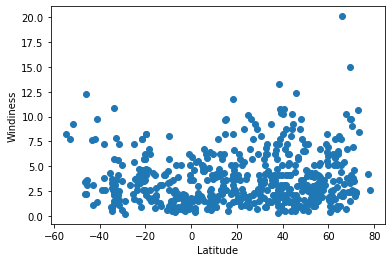

In [30]:
# Wind Speed (mph) vs. Latitude
x_values = city_weather_data['lat']
y_values = city_weather_data['windy']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Windiness')
plt.show()

## Linear Regression

In [31]:
# OPTIONAL: Create a function to create Linear Regression plots
# Create line equation string

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

y = 0.01x +3.58
0      4.033062
1      3.660591
2      3.749853
3      3.805932
4      3.976776
         ...   
552    3.343035
553    3.592514
554    3.671766
555    3.883265
556    3.619457
Name: lat, Length: 557, dtype: float64


In [32]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisph = city_weather_data.loc[city_weather_data['lat'] > 0]
northern_hemisph

southern_hemisph = city_weather_data.loc[city_weather_data['lat'] < 0]
southern_hemisph

,Country,City,lat,lng,temp,humidity,cloudy,windy
7,AO,Soyo,-6.13,12.37,25.81,83,98,2.32
8,CL,Punta Arenas,-53.15,-70.92,12.89,43,75,7.70
9,ZA,Hermanus,-34.42,19.23,20.00,47,65,0.83
10,MZ,Inhambane,-23.86,35.38,25.00,69,20,3.10
11,PF,Rikitea,-23.12,-134.97,25.05,73,18,3.37
...,...,...,...,...,...,...,...,...
537,BR,Laje,-10.18,-40.97,23.56,65,84,3.34
544,ID,Samarinda,-0.50,117.15,24.41,95,100,0.83
547,PE,Talara,-4.58,-81.27,30.00,51,31,5.10
551,MZ,Manjacaze,-24.71,33.88,21.18,83,0,3.72


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.57x + 34.73
0      -3.215123
1      28.024335
2      20.537905
3      15.834449
4       1.505583
         ...    
550     0.579841
553    33.734032
554    27.087094
555     9.348510
556    31.474303
Name: lat, Length: 394, dtype: float64
The r-squared is: 0.7916854034252511


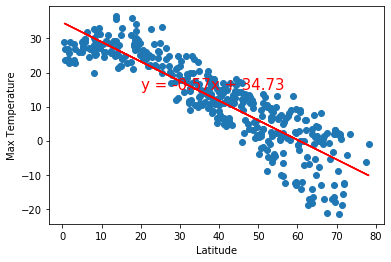

In [33]:
x_n_temp_lat = northern_hemisph['lat']
y_n_temp_lat = northern_hemisph['temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_n_temp_lat, y_n_temp_lat)

line_eq1 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq1)

# Get regression values
regress_values = x_n_temp_lat * slope + intercept
print(regress_values)# Create Plot

plt.scatter(x_n_temp_lat,y_n_temp_lat)
plt.plot(x_n_temp_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq1,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.32x +28.36
7      26.386650
8      11.257279
9      17.283930
10     20.681764
11     20.919870
         ...    
537    25.083504
544    28.198185
547    26.885386
551    20.408264
552    17.209924
Name: lat, Length: 163, dtype: float64
The r-squared is: 0.4982632184093324


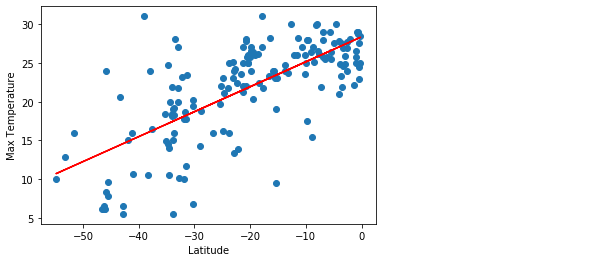

In [34]:
x_s_temp_lat = southern_hemisph['lat']
y_s_temp_lat = southern_hemisph['temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_s_temp_lat, y_s_temp_lat)

line_eq2 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq2)

# Get regression values
regress_values = x_s_temp_lat * slope + intercept
print(regress_values)# Create Plot

plt.scatter(x_s_temp_lat,y_s_temp_lat)
plt.plot(x_s_temp_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq2,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.36x + 53.48
0      77.312409
1      57.696209
2      62.397165
3      65.350607
4      74.348136
         ...    
550    74.929436
553    54.110918
554    58.284732
555    69.423325
556    55.529870
Name: lat, Length: 394, dtype: float64
The r-squared is: 0.09713596239501356


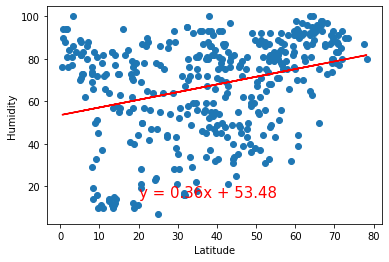

In [35]:
x_n_temp_lat = northern_hemisph['lat']
y_n_temp_lat = northern_hemisph['humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_n_temp_lat, y_n_temp_lat)

line_eq1 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq1)

# Get regression values
regress_values = x_n_temp_lat * slope + intercept
print(regress_values)# Create Plot

plt.scatter(x_n_temp_lat,y_n_temp_lat)
plt.plot(x_n_temp_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq1,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.25x +77.57
7      76.053598
8      64.414811
9      69.051019
10     71.664919
11     71.848090
         ...    
537    75.051108
544    77.447184
547    76.437267
551    71.454520
552    68.994087
Name: lat, Length: 163, dtype: float64
The r-squared is: 0.03597227753139835


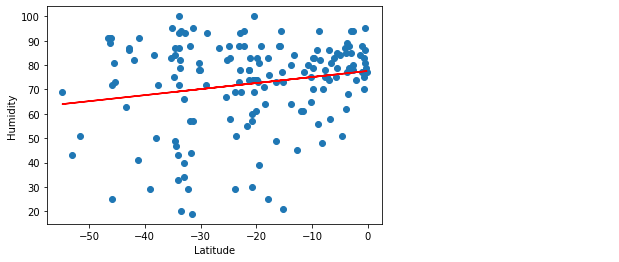

In [36]:
x_s_temp_lat = southern_hemisph['lat']
y_s_temp_lat = southern_hemisph['humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_s_temp_lat, y_s_temp_lat)

line_eq2 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq2)

# Get regression values
regress_values = x_s_temp_lat * slope + intercept
print(regress_values)# Create Plot

plt.scatter(x_s_temp_lat,y_s_temp_lat)
plt.plot(x_s_temp_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq2,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.19x + 46.74
0      58.961792
1      48.897805
2      51.309606
3      52.824853
4      57.440987
         ...    
550    57.739221
553    47.058391
554    49.199743
555    54.914339
556    47.786377
Name: lat, Length: 394, dtype: float64
The r-squared is: 0.009470254311130844


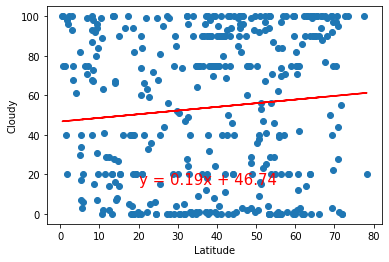

In [37]:
x_n_temp_lat = northern_hemisph['lat']
y_n_temp_lat = northern_hemisph['cloudy']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_n_temp_lat, y_n_temp_lat)

line_eq1 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq1)

# Get regression values
regress_values = x_n_temp_lat * slope + intercept
print(regress_values)# Create Plot

plt.scatter(x_n_temp_lat,y_n_temp_lat)
plt.plot(x_n_temp_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudy')
plt.annotate(line_eq1,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.37x +62.89
7      60.655109
8      43.488462
9      50.326643
10     54.182019
11     54.452188
         ...    
537    59.176484
544    62.710579
547    61.221002
551    53.871691
552    50.242672
Name: lat, Length: 163, dtype: float64
The r-squared is: 0.021454288700514516


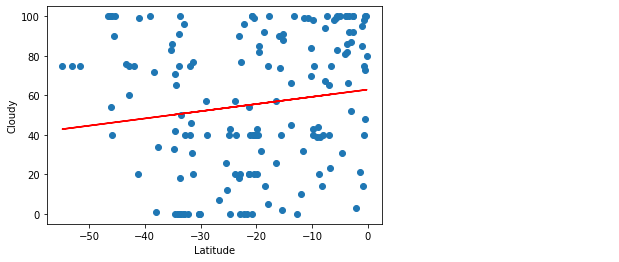

In [38]:
x_s_temp_lat = southern_hemisph['lat']
y_s_temp_lat = southern_hemisph['cloudy']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_s_temp_lat, y_s_temp_lat)

line_eq2 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq2)

# Get regression values
regress_values = x_s_temp_lat * slope + intercept
print(regress_values)# Create Plot

plt.scatter(x_s_temp_lat,y_s_temp_lat)
plt.plot(x_s_temp_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudy')
plt.annotate(line_eq2,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.01x + 3.42
0      4.237646
1      3.563248
2      3.724865
3      3.826403
4      4.135735
         ...   
550    4.155720
553    3.439987
554    3.583481
555    3.966422
556    3.488770
Name: lat, Length: 394, dtype: float64
The r-squared is: 0.00824152473875937


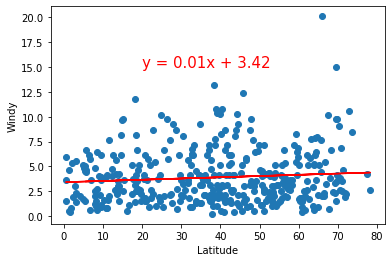

In [39]:
x_n_temp_lat = northern_hemisph['lat']
y_n_temp_lat = northern_hemisph['windy']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_n_temp_lat, y_n_temp_lat)

line_eq1 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq1)

# Get regression values
regress_values = x_n_temp_lat * slope + intercept
print(regress_values)# Create Plot

plt.scatter(x_n_temp_lat,y_n_temp_lat)
plt.plot(x_n_temp_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Windy')
plt.annotate(line_eq1,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.06x +2.08
7      2.443311
8      5.228231
9      4.118883
10     3.493431
11     3.449602
         ...   
537    2.683186
544    2.109855
547    2.351507
551    3.543775
552    4.132506
Name: lat, Length: 163, dtype: float64
The r-squared is: 0.12566354682581152


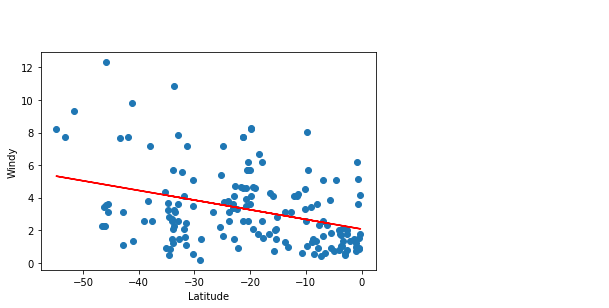

In [40]:
x_s_temp_lat = southern_hemisph['lat']
y_s_temp_lat = southern_hemisph['windy']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_s_temp_lat, y_s_temp_lat)

line_eq2 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq2)

# Get regression values
regress_values = x_s_temp_lat * slope + intercept
print(regress_values)# Create Plot

plt.scatter(x_s_temp_lat,y_s_temp_lat)
plt.plot(x_s_temp_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Windy')
plt.annotate(line_eq2,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()